<a href="https://colab.research.google.com/github/yweslakarep123/customer_segmented-cluster/blob/main/cutomer_segmentation_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!chmod 600 /content/kaggle.json

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [6]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 4.27MB/s]


In [7]:
!pip install patool pyunpack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 3.5 MB/s eta 0:00:00


In [8]:
from pyunpack import Archive
zip_file_path = '/content/customer-segmentation-tutorial-in-python.zip'
extract_directory = '/content/drive/MyDrive/Test_dataset'
# Buka dan ekstrak file ZIP menggunakan patool
Archive(zip_file_path).extractall(extract_directory)

# Output pesan jika ekstraksi selesai
print("Ekstraksi selesai.")

Ekstraksi selesai.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Test_dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.shape

(200, 5)

In [ ]:
x = df.iloc[:,[3,4]].values
x

In [15]:
from sklearn.cluster import KMeans

In [21]:
wcss = []

for i in range(1,31):
  kmeans = KMeans(n_clusters = i,init = 'k-means++',n_init="auto",random_state=0).fit(x)

  wcss.append(kmeans.inertia_)


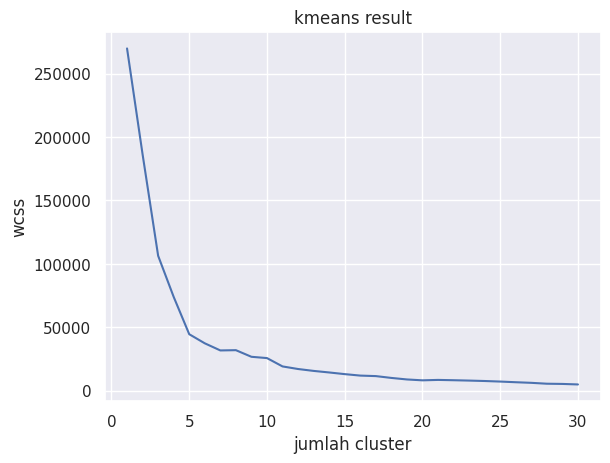

In [24]:
plt.plot(range(1,31),wcss)
plt.title('kmeans result')
plt.xlabel('jumlah cluster')
plt.ylabel('wcss')
sns.set()
plt.show()

In [26]:
kmeans = KMeans(n_clusters=5, init ='k-means++', n_init='auto', random_state=0)
y = kmeans.fit_predict(x)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

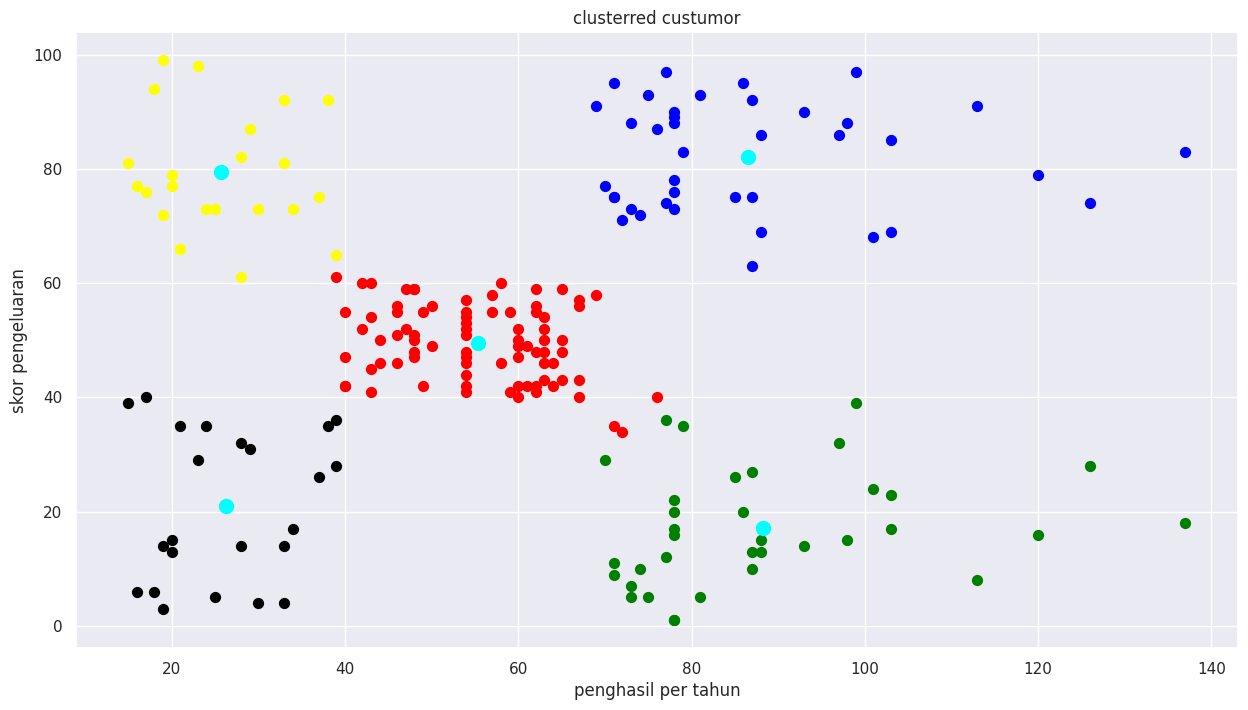

In [28]:
plt.figure(figsize=(15,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50,c='green', label='cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50,c='red', label='cluster 1')
plt.scatter(x[y==2,0], x[y==2,1], s=50,c='blue', label='cluster 1')
plt.scatter(x[y==3,0], x[y==3,1], s=50,c='yellow', label='cluster 1')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='black', label='cluster 1')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='cluster center')

plt.title('clusterred custumor')
plt.xlabel('penghasil per tahun')
plt.ylabel('skor pengeluaran')
plt.show()